## 0304_usable

In [43]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import catboost
from catboost import CatBoostClassifier, CatBoostRegressor

import xgboost as xgb
from matplotlib.font_manager import FontProperties
import shap

shap.initjs()

In [44]:
#配色
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
brownse = (208/255, 134/255, 48/255,1)
greyse = (158/255, 158/255, 158/255,1)
bluegreyse = (76/255, 114/255, 176/255,1)

font = FontProperties(family='Arial', size=12)

In [45]:
# 指定文件路径
file_path = "../SOH1/EIS_state_V/EIS_V.txt"

# 读取文本文件，使用多个制表符作为分隔符
data = pd.read_csv(file_path, sep='\t', header=None, names=["Z_" + str(i) for i in range(120)])

# 显示前几行数据
data.head()

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_110,Z_111,Z_112,Z_113,Z_114,Z_115,Z_116,Z_117,Z_118,Z_119
0,0.38470,0.39156,0.39684,0.40341,0.40963,0.41925,0.42764,0.43530,0.44525,0.45744,...,0.08888,0.10230,0.11767,0.13411,0.15473,0.18024,0.21535,0.25411,0.29026,0.32795
1,0.38886,0.39343,0.40066,0.40798,0.41472,0.42210,0.43087,0.44032,0.45061,0.46045,...,0.09005,0.10526,0.12138,0.13894,0.15901,0.18200,0.21310,0.24700,0.28064,0.32300
2,0.39038,0.39600,0.40250,0.40874,0.41617,0.42422,0.43090,0.44257,0.45141,0.46294,...,0.09073,0.10267,0.11865,0.14024,0.16487,0.18764,0.21288,0.24707,0.28773,0.32955
3,0.39194,0.39643,0.40406,0.41059,0.41739,0.42510,0.43446,0.44279,0.45283,0.46578,...,0.09112,0.10434,0.12045,0.13810,0.15939,0.18213,0.21587,0.25741,0.29768,0.33673
4,0.39225,0.39760,0.40540,0.41088,0.41967,0.42648,0.43666,0.44412,0.45343,0.46610,...,0.09144,0.10645,0.12356,0.14088,0.16121,0.18483,0.21609,0.24984,0.28396,0.32562


In [46]:
np.shape(data)

(2301, 120)

In [47]:
# 指定 y 文件的路径
# y_file_path = "../SOH1/合集数据/SOH_all_40_temp.txt"
# y_file_path = "../SOH1/SOH_all_1.txt"
y_file_path = "../SOH1/合集数据/NEWSOH_all_40.txt"
# 读取 y 文件
with open(y_file_path, "r") as file:
    # 逐行读取 y 值，将其转换为浮点数并存储在一个列表中
    y_values = [float(line.strip()) for line in file]

# 将 y 值存储在 Pandas Series 中
y_series = pd.Series(y_values, name="SOH")

# 显示前几个 y 值
np.shape(y_series)

(2301,)

In [48]:
L1=list(range(0, 190))
L2=list(range(190, 370))
L3=list(range(370, 571))
L4=list(range(571, 605))
L5=list(range(605, 798))
L6=list(range(798, 953))
L7=list(range(954, 1046))
L8=list(range(1047, 1082))

L9=list(range(1083, 1377))
L10=list(range(1377, 1694))
L11=list(range(1764, 1991))
L12=list(range(1992, 2301))

In [49]:
C0 = data
#25
C1 = data.loc[L1].copy()
C2 = data.loc[L2].copy()
C3 = data.loc[L3].copy()
C4 = data.loc[L4].copy() ##坏的,不可单独使用
C5 = data.loc[L5].copy()  ##24678d坏的
C6 = data.loc[L6].copy()
C7 = data.loc[L7].copy()
C8 = data.loc[L8].copy() ##坏的
#35
C9 = data.loc[L9].copy()
C10 = data.loc[L10].copy()
#45
C11 = data.loc[L11].copy()
C12 = data.loc[L12].copy()

In [50]:
Y0 = y_series
#25
Y1 = y_series.loc[L1].copy()
Y2 = y_series.loc[L2].copy()
Y3 = y_series.loc[L3].copy()

Y4 = y_series.loc[L4].copy() ##坏的,不可单独使用
Y5 = y_series.loc[L5].copy()  ##24678d坏的

Y6 = y_series.loc[L6].copy()
Y7 = y_series.loc[L7].copy()

Y8 = y_series.loc[L8].copy() ##坏的
#35
Y9 = y_series.loc[L9].copy()
Y10 = y_series.loc[L10].copy()
#45
Y11 = y_series.loc[L11].copy()
Y12 = y_series.loc[L12].copy()

In [51]:
# train&test
waqu = L1+L3+L5+L10+L11+L12

X_train = data.loc[waqu].copy()
y_train = y_series.loc[waqu].copy()

X_test = C9
y_test = Y9

In [52]:
print("训练集",np.shape(X_train),np.shape(y_train),"测试集",np.shape(X_test),np.shape(y_test))

训练集 (1437, 120) (1437,) 测试集 (294, 120) (294,)


In [53]:
select_battery = '9'
MLmodel = 'catboost'

In [54]:
select_battery

'9'

数据读取完毕，开始训练模型

## 第一次计算精度，全部特征

In [55]:
# train model
model = CatBoostRegressor()
# model.fit(X, y)
model.fit(X_train, y_train, verbose=False, plot=False)

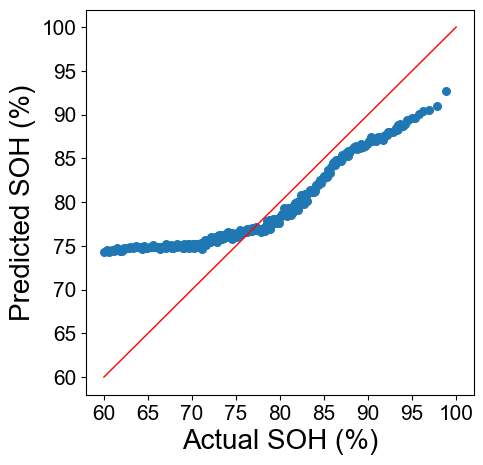

In [56]:
# get predictions
y_pred = model.predict(X_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred,s=30)
plt.plot([60, 100], [60, 100], color="r", linestyle="-", linewidth=1)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_all_z.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_all_z.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# mse = mean_squared_error(y, y_pred)
mse_all = mean_squared_error(y_test, y_pred)
print("均方误差 (MSE):", mse_all)

rmse_all = np.sqrt(mse_all)
print("均方根误差 (RMSE):", rmse_all)

# r2 = r2_score(y, y_pred)
r2_all = r2_score(y_test, y_pred)
print("决定系数 (R^2):", r2_all)

均方误差 (MSE): 27.39780511240918
均方根误差 (RMSE): 5.234291271261964
决定系数 (R^2): 0.6740444752150293


1) Standard SHAP values

In [58]:
%%time
# get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# shap_values = explainer(X[0:100])

Wall time: 270 ms


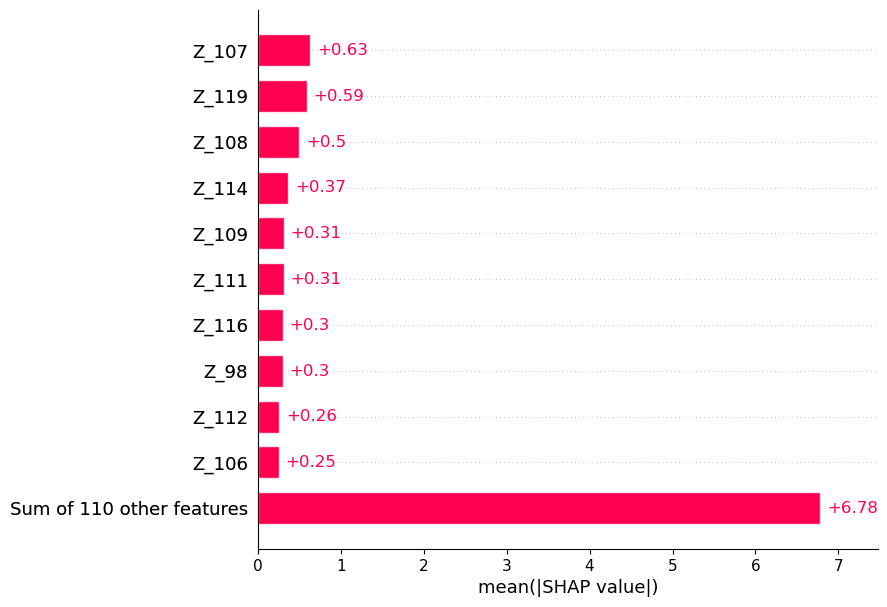

In [59]:
# mean SHAP
shap.plots.bar(shap_values, max_display=11,show=False)
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [60]:
# 计算绝对值并按列求和
abs_shap_values = np.abs(shap_values.values) #取绝对值
mean = abs_shap_values.sum(axis=0) #求和

# 获取前k个最大值
k = 10
meantop = mean.argsort()[-k:][::-1]
meanbottom = mean.argsort()[:k]
#shap值
num_samples = shap_values.values.shape[0]
normalized_mean = mean / num_samples

# mean 中的前k个最大值
top_k_values = normalized_mean[meantop]
top_k_values

array([0.63381258, 0.59136925, 0.49988388, 0.36801136, 0.3140223 ,
       0.31204369, 0.30254302, 0.30047261, 0.25779601, 0.2545487 ])

In [61]:
np.shape(shap_values.values)

(294, 120)

In [62]:
print(meantop)
print(meanbottom)

[107 119 108 114 109 111 116  98 112 106]
[ 46  52  82  72 103  56  39  22 105  20]


In [63]:
X_top10_test = X_test.iloc[:, meantop]
# print(X_top10_test)
X_top10 = X_train.iloc[:, meantop]
# print(X_top10)
# train model
model_select = CatBoostRegressor()
# model.fit(X, y)
model_select.fit(X_top10, y_train, verbose=False, plot=False)

## 模型预测

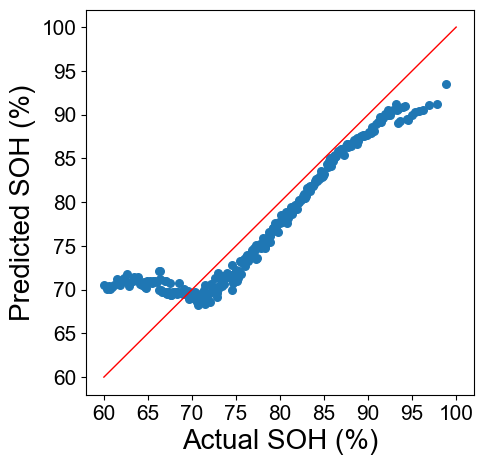

In [64]:
# get predictions
# y_pred = model.predict(X)
y_pred_select = model_select.predict(X_top10_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred_select,s=30)
plt.plot([60 ,100], [60, 100], color="r", linestyle="-", linewidth=1)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_top10.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_top10.jpg", format='jpg', dpi=600, bbox_inches='tight')
plt.show()
plt.close()

计算结果

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# mse = mean_squared_error(y, y_pred)
mse_preferred = mean_squared_error(y_test, y_pred_select)
rmse_preferred = np.sqrt(mse_preferred)
r2_preferred = r2_score(y_test, y_pred_select)

print("均方误差 (MSE):", mse_all)
print("均方根误差 (RMSE):", rmse_all)
print("决定系数 (R^2):", r2_all)
print("top10Z 均方根误差 (RMSE):", rmse_preferred)
print("top10Z 均方误差 (MSE):", mse_preferred)
print("top10Z 决定系数 (R^2):", r2_preferred)

均方误差 (MSE): 27.39780511240918
均方根误差 (RMSE): 5.234291271261964
决定系数 (R^2): 0.6740444752150293
top10Z 均方根误差 (RMSE): 3.507956964106261
top10Z 均方误差 (MSE): 12.305762062021616
top10Z 决定系数 (R^2): 0.853596625191392


bottom_10个Z的训练

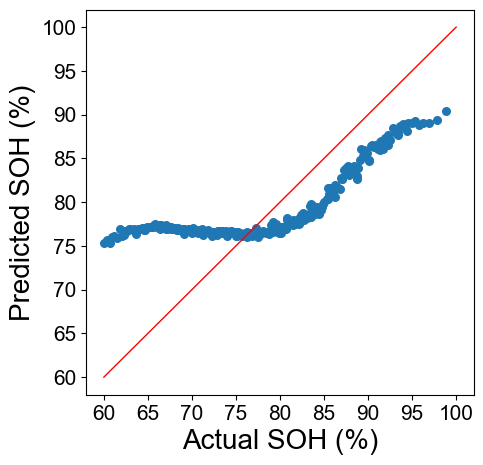

In [66]:
X_bot10_test = X_test.iloc[:, meanbottom]
# print(X_top10_test)
X_bot10_train = X_train.iloc[:, meanbottom]
# print(X_top10)
# train model
model_select_bot =  CatBoostRegressor()
# model.fit(X, y)
model_select_bot.fit(X_bot10_train, y_train, verbose=False, plot=False)

# get predictions
# y_pred = model.predict(X)
y_pred_select_bot = model_select_bot.predict(X_bot10_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred_select_bot,s=30)
plt.plot([60, 100], [60, 100], color="r", linestyle="-", linewidth=1)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_bot10.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_bot10.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [67]:
# mse = mean_squared_error(y, y_pred)
mse_preferred_bot = mean_squared_error(y_test, y_pred_select_bot)
rmse_preferred_bot = np.sqrt(mse_preferred_bot)
r2_preferred_bot = r2_score(y_test, y_pred_select_bot)

print("均方误差 (MSE):", mse_all)
print("均方根误差 (RMSE):", rmse_all)
print("决定系数 (R^2):", r2_all)
print("     ")
print("top10Z 均方误差 (MSE):", mse_preferred)
print("top10Z 均方根误差 (RMSE):", rmse_preferred)
print("top10Z 决定系数 (R^2):", r2_preferred)
print("     ")
print("bot10Z 均方误差 (MSE):", mse_preferred_bot)
print("bot10Z 均方根误差 (RMSE):", rmse_preferred_bot)
print("bot10Z 决定系数 (R^2):", r2_preferred_bot)
print(meantop)
print(meanbottom)

均方误差 (MSE): 27.39780511240918
均方根误差 (RMSE): 5.234291271261964
决定系数 (R^2): 0.6740444752150293
     
top10Z 均方误差 (MSE): 12.305762062021616
top10Z 均方根误差 (RMSE): 3.507956964106261
top10Z 决定系数 (R^2): 0.853596625191392
     
bot10Z 均方误差 (MSE): 43.6208270440911
bot10Z 均方根误差 (RMSE): 6.604606501835753
bot10Z 决定系数 (R^2): 0.48103691108193014
[107 119 108 114 109 111 116  98 112 106]
[ 46  52  82  72 103  56  39  22 105  20]


In [68]:
# 准备箱型图数据
y_testv=y_test.values
values_to_save = [ select_battery,MLmodel,y_testv,y_pred,y_pred_select,y_pred_select_bot]
value_names = ["电池","模型","y测试值","y_all_pred","y_top_pred","y_bot_pred"]

file_name = f"pre_boxfig_被测电池_{select_battery}_模型{MLmodel}.txt"
# 打开文件以写入数据
with open(file_name, "w") as file:
    for name, value in zip(value_names, values_to_save):
        file.write(f"{name}: {value}\n")

## 任选特征训练；最优特征

# some1=meantop

In [70]:
some2=meanbottom

In [71]:
some3 = [95, 112, 74, 94, 97, 73, 99, 110, 92,  31]

In [72]:
some = some3

In [73]:
some

[95, 112, 74, 94, 97, 73, 99, 110, 92, 31]

In [74]:
X_some_train=X_train.iloc[:, some]
X_some_test=X_test.iloc[:, some]

In [75]:
np.shape(X_some_test)

(294, 10)

In [76]:
# train model
model_some = CatBoostRegressor()
# model.fit(X, y)
model_some.fit(X_some_train, y_train, verbose=False, plot=False)

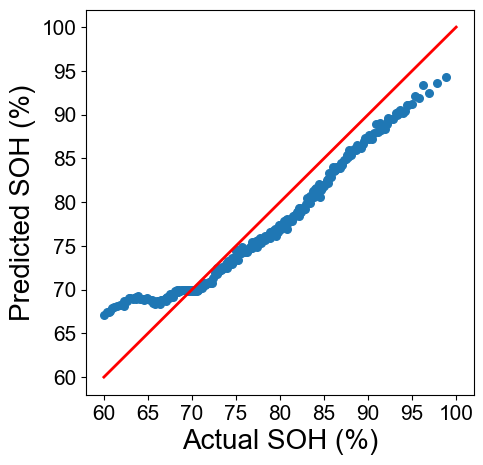

In [77]:
font = FontProperties(family='Arial', size=12)
# get predictions
# y_pred = model.predict(X)
y_pred_some = model_some.predict(X_some_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred_some,s=30)
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.plot([60, 100], [60, 100], color="r", linestyle="-", linewidth=2)
plt.show()
plt.close()

In [78]:
# mse = mean_squared_error(y, y_pred)
mse_some = mean_squared_error(y_test, y_pred_some)
rmse_some = np.sqrt(mse_some)
r2_some = r2_score(y_test, y_pred_some)

print("均方误差 (MSE):", mse_all)
print("均方根误差 (RMSE):", rmse_all)
print("决定系数 (R^2):", r2_all)
print("     ")
print("top10Z 均方根误差 (RMSE):", rmse_preferred)
print("top10Z 均方误差 (MSE):", mse_preferred)
print("top10Z 决定系数 (R^2):", r2_preferred)
print("     ")
print("bot10Z 均方根误差 (RMSE):", rmse_preferred_bot)
print("bot10Z 均方误差 (MSE):", mse_preferred_bot)
print("bot10Z 决定系数 (R^2):", r2_preferred_bot)
print("     ")
print("some 均方根误差 (RMSE):", rmse_some)
print("some 均方误差 (MSE):", mse_some)
print("some 决定系数 (R^2):", r2_some)

均方误差 (MSE): 27.39780511240918
均方根误差 (RMSE): 5.234291271261964
决定系数 (R^2): 0.6740444752150293
     
top10Z 均方根误差 (RMSE): 3.507956964106261
top10Z 均方误差 (MSE): 12.305762062021616
top10Z 决定系数 (R^2): 0.853596625191392
     
bot10Z 均方根误差 (RMSE): 6.604606501835753
bot10Z 均方误差 (MSE): 43.6208270440911
bot10Z 决定系数 (R^2): 0.48103691108193014
     
some 均方根误差 (RMSE): 2.8344155522570307
some 均方误差 (MSE): 8.033911522876528
some 决定系数 (R^2): 0.90441942937505


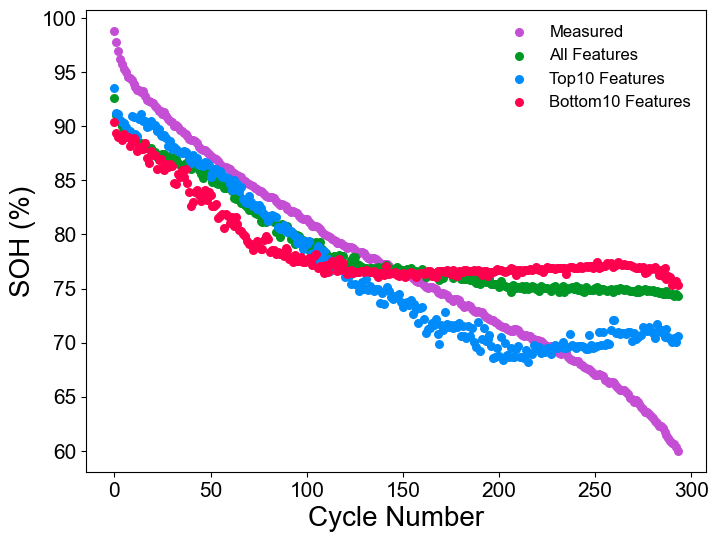

In [79]:

font = FontProperties(family='Arial', size=12)
plt.figure(figsize=(8, 6))

x = list(range(len(y_test)))

# 绘制图形

s_point=30
plt.scatter(x, y_test, color=purplese, label='Measured', s=s_point)
plt.scatter(x, y_pred, color=greense, label='All Features', s=s_point)
plt.scatter(x, y_pred_select, color=bluese, label='Top10 Features', s=s_point)
plt.scatter(x, y_pred_select_bot, color=redse, label='Bottom10 Features', s=s_point)

# plt.scatter(x, y_pred_some, color='orange', label='Final10 Features', s=s_point)
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
# # 添加图例

plt.legend(prop=font, facecolor='white', frameon=False)



# 添加坐标轴名称
plt.xlabel('Cycle Number', fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel('SOH (%)', fontdict={'size': 20, 'family': 'Arial'})
# 显示图表
# 添加刻度线
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图全.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图全.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

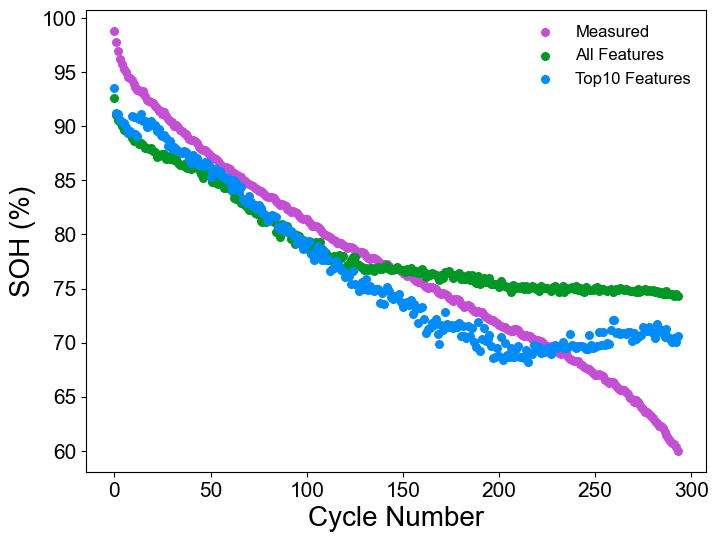

In [80]:
font = FontProperties(family='Arial', size=12)
plt.figure(figsize=(8, 6))

x = list(range(len(y_test)))

# 绘制图形

s_point=30
plt.scatter(x, y_test, color=purplese, label='Measured', s=s_point)
plt.scatter(x, y_pred, color=greense, label='All Features', s=s_point)
plt.scatter(x, y_pred_select, color=bluese, label='Top10 Features', s=s_point)
# plt.scatter(x, y_pred_select_bot, color=redse, label='Bottom10 Features', s=s_point)

# plt.scatter(x, y_pred_some, color='orange', label='Final10 Features', s=s_point)
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
# # 添加图例

plt.legend(prop=font, facecolor='white', frameon=False)



# 添加坐标轴名称
plt.xlabel('Cycle Number', fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel('SOH (%)', fontdict={'size': 20, 'family': 'Arial'})
# 显示图表
# 添加刻度线
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图无底部.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图无底部.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

## 随机选择k个点，作为输入特征的性能。

In [81]:
import random
import numpy as np
import xgboost as xgb
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

# 初始化一个空列表来存储所有的 r2_score
r2_scores = []
same_variables = []
mse_sames = []

# 设置循环次数 w
w = 200
# 设置特征数量
random_number = 10

# 特征总数
total_features = X_train.shape[1]

for _ in range(w):
    # 随机选择五个特征的索引
    random_features = random.sample(range(total_features), random_number)

    # 转化成字符串并用逗号分隔
    five = ",".join(map(str, random_features))

    # 复制到 some 变量
    same = five

    # 存储 some 变量
    same_variables.append(same)
    
    # 从 X_train 和 X_test 中提取对应的特征
    X_same_train = X_train.iloc[:, random_features]
    X_same_test = X_test.iloc[:, random_features]

    # 初始化 catBoost 模型
    model_same = CatBoostRegressor()

    # 训练模型
    model_same.fit(X_same_train, y_train, verbose=False, plot=False)

    # 预测
    y_pred_same = model_same.predict(X_same_test)

    # 计算 R-squared 分数
    r2_same_random = r2_score(y_test, y_pred_same)

    # 存储 R-squared 分数
    r2_scores.append(r2_same_random)
    
    # mse = mean_squared_error(y, y_pred)
    mse_same = mean_squared_error(y_test, y_pred_same)
    mse_sames.append(mse_same)
    
# 输出所有 R-squared 分数
np.shape(r2_scores)


(200,)

In [82]:
# 计算R-squared的平均值
average_r2 = sum(r2_scores) / len(r2_scores)

std_deviation = np.std(r2_scores)
print("Random_numbers:",random_number,".","Average R-squared:", average_r2,f"R-squared标准差: {std_deviation}")

Random_numbers: 10 . Average R-squared: 0.4735863722107081 R-squared标准差: 0.20520085878360395


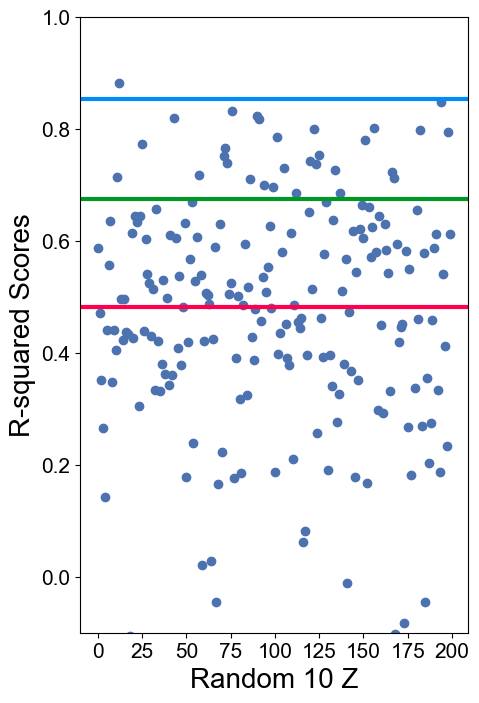

In [83]:
import matplotlib.patches as mpatches
font = FontProperties(family='Arial', size=12)

# plt.figure(figsize=(5, 8), facecolor='white')

plt.figure(figsize=(5, 8))

# # 使用序号作为横坐标，r2_scores 作为纵坐标
plt.scatter(range(len(same_variables)), r2_scores,color=bluegreyse)

# 添加标签

plt.xlabel("Random 10 Z", fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel("R-squared Scores", fontdict={'size': 20, 'family': 'Arial'})
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15


y_allfe = r2_all ##全部特征，绿色
plt.axhline(y=y_allfe, color=greense, linewidth=3)

y_topfe=r2_preferred#顶部十个特征，蓝色
plt.axhline(y=y_topfe, color=bluese, linewidth=3)

y_bottomfe= r2_preferred_bot #底部十个特征，红色
plt.axhline(y=y_bottomfe, color=redse, linewidth=3)

# y_some= r2_some #最优十个特征，棕色
# plt.axhline(y=y_some, color=purplese, linewidth=3)

plt.ylim(-0.1, 1.0)
# plt.savefig( f"{select_battery}_{MLmodel}_性能图.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig(f"{select_battery}_{MLmodel}_性能图.eps", format='eps', dpi=600, bbox_inches='tight')
# 创建自定义图例
legend_elements = [
    mpatches.Patch(color=greense, label='All Z'),
    mpatches.Patch(color=bluese, label='Top10 Z'),
    mpatches.Patch(color=redse, label='Bottom10 Z'),
    mpatches.Patch(color=bluegreyse, label='Random10 Z')
]

# 添加自定义图例到图表
# plt.legend(handles=legend_elements,prop=font, facecolor='white', frameon=False,loc=(0.60,0.05))
plt.grid(False)
# 显示图表

plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_random.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_random.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

In [84]:
# 输出所有的 R-squared 分数和 some 变量
for i in range(w):
    print(f"Iteration {i+1}: R-squared = {r2_scores[i]},mse= {mse_sames[i]} ,same = {same_variables[i]}")

Iteration 1: R-squared = 0.5863192574230599,mse= 34.77144426791537 ,same = 51,94,92,65,58,75,5,13,8,114
Iteration 2: R-squared = 0.4702563304226497,mse= 44.52697596761808 ,same = 78,3,12,108,9,58,66,29,113,33
Iteration 3: R-squared = 0.3508986024510191,mse= 54.55944825592783 ,same = 33,83,63,12,88,20,61,74,46,1
Iteration 4: R-squared = 0.2651527029791303,mse= 61.766718157147686 ,same = 22,83,72,32,6,7,61,8,117,116
Iteration 5: R-squared = 0.14273640234301332,mse= 72.05627514386538 ,same = 72,5,29,82,112,50,23,19,41,1
Iteration 6: R-squared = 0.44066059604228935,mse= 47.01461032585347 ,same = 72,51,99,34,63,65,14,64,31,78
Iteration 7: R-squared = 0.5570605794047692,mse= 37.230747753323946 ,same = 83,25,74,40,56,115,91,79,3,35
Iteration 8: R-squared = 0.6346992450876534,mse= 30.704921774548477 ,same = 74,84,12,36,97,115,19,94,100,47
Iteration 9: R-squared = 0.3480920131091002,mse= 54.7953527949633 ,same = 91,43,38,117,118,3,33,65,15,39
Iteration 10: R-squared = 0.44020393207392516,mse= 4

normalized_mean #全部的shap值
top_k_values #前10个shap的值
meantop #前10个shap的特征

mse_all
rmse_all
r2_all

rmse_preferred
mse_preferred
r2_preferred

rmse_preferred_bot
mse_preferred_bot
r2_preferred_bot

rmse_some
mse_some
r2_some
r2_scores #随机特征的结果
select_battery = '第1节'

## 保存重要数据

In [99]:
# 创建一个包含多个变量的字典
values_to_save = [ select_battery,MLmodel,r2_all,r2_preferred,r2_preferred_bot,r2_some,average_r2,meantop, normalized_mean, top_k_values,rmse_all,mse_all,  rmse_preferred, mse_preferred,rmse_preferred_bot,mse_preferred_bot,rmse_some,mse_some,r2_scores]
value_names = ["电池","模型","全部特征精度","顶部特征精度","底部特征精度","终选特征精度","随机特征平均精度","top10特征", "全部的shap值", "top10 shap值","rmse_all","mse_all","rmse_top", "mse_top", "rmse_bot","mse_bot","rmse_some终选","mse_some终选","r2_scores随机特征"]

file_name = f"被测电池_{select_battery}_模型{MLmodel}_全部数据.txt"
# 打开文件以写入数据
with open(file_name, "w") as file:
    for name, value in zip(value_names, values_to_save):
        file.write(f"{name}: {value}\n")



In [ ]:
## end